In [2]:
import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cwd = os.getcwd()
adata = sc.read_h5ad(cwd+'/outs/240701_kinker_anndata.h5ad')

In [4]:
def BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=n_top_genes, flavor='seurat')
    #sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, random_state=random_state)
    sc.tl.umap(adata, random_state=random_state)
    sc.tl.leiden(adata, random_state=random_state)
    return adata

In [5]:
adata = BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/qx/ky79g97s1hxbjkrf9b5sshq00000gn/T/ipykernel_60450/2934595701.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state=random_state)


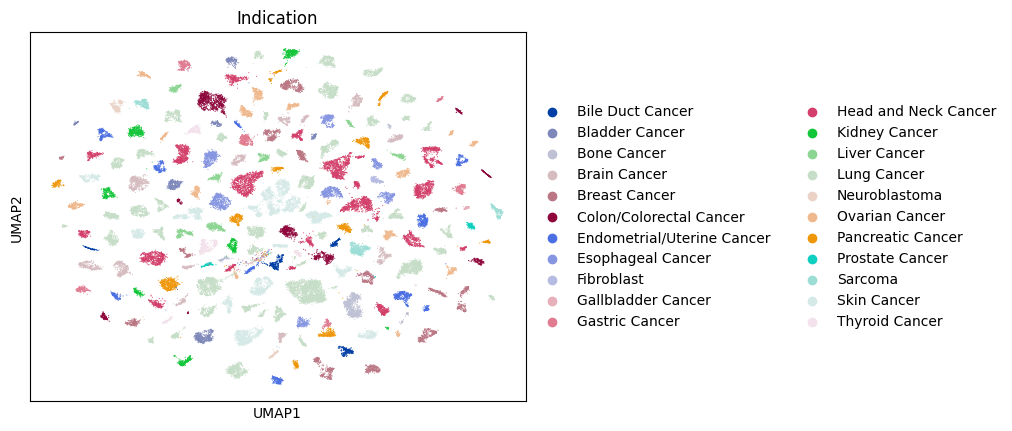

In [6]:
sc.pl.umap(adata, color=['Indication'])

In [12]:
adata.layers['counts'] = adata.X.copy()
adata.layers['log2_counts'] = scipy.sparse.csr_matrix(np.log2(adata.layers['counts'].toarray()+1))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Bile Duct Cancer'),
  Text(1, 0, 'Bladder Cancer'),
  Text(2, 0, 'Bone Cancer'),
  Text(3, 0, 'Brain Cancer'),
  Text(4, 0, 'Breast Cancer'),
  Text(5, 0, 'Colon/Colorectal Cancer'),
  Text(6, 0, 'Endometrial/Uterine Cancer'),
  Text(7, 0, 'Esophageal Cancer'),
  Text(8, 0, 'Fibroblast'),
  Text(9, 0, 'Gallbladder Cancer'),
  Text(10, 0, 'Gastric Cancer'),
  Text(11, 0, 'Head and Neck Cancer'),
  Text(12, 0, 'Kidney Cancer'),
  Text(13, 0, 'Liver Cancer'),
  Text(14, 0, 'Lung Cancer'),
  Text(15, 0, 'Neuroblastoma'),
  Text(16, 0, 'Ovarian Cancer'),
  Text(17, 0, 'Pancreatic Cancer'),
  Text(18, 0, 'Prostate Cancer'),
  Text(19, 0, 'Sarcoma'),
  Text(20, 0, 'Skin Cancer'),
  Text(21, 0, 'Thyroid Cancer')])

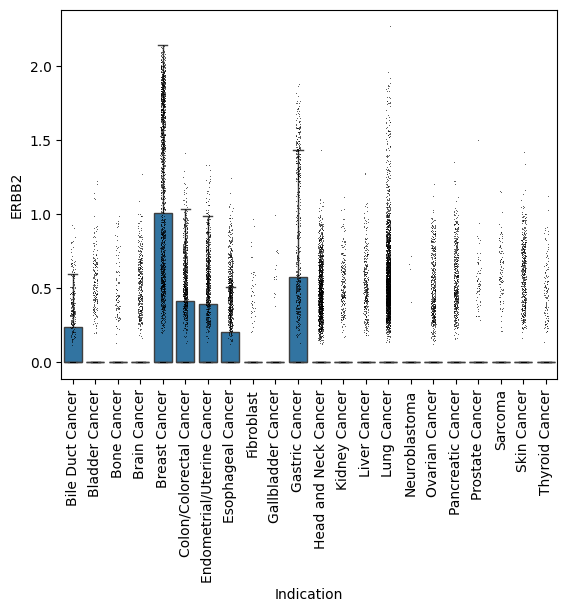

In [13]:
#HER2 vs indication 
df = sc.get.obs_df(adata, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']
sns.boxplot(data=df, x='Indication', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='Indication', y='ERBB2', color='black', size=0.5, jitter=True)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Bile Duct Cancer'),
  Text(1, 0, 'Bladder Cancer'),
  Text(2, 0, 'Bone Cancer'),
  Text(3, 0, 'Brain Cancer'),
  Text(4, 0, 'Breast Cancer'),
  Text(5, 0, 'Colon/Colorectal Cancer'),
  Text(6, 0, 'Endometrial/Uterine Cancer'),
  Text(7, 0, 'Esophageal Cancer'),
  Text(8, 0, 'Fibroblast'),
  Text(9, 0, 'Gallbladder Cancer'),
  Text(10, 0, 'Gastric Cancer'),
  Text(11, 0, 'Head and Neck Cancer'),
  Text(12, 0, 'Kidney Cancer'),
  Text(13, 0, 'Liver Cancer'),
  Text(14, 0, 'Lung Cancer'),
  Text(15, 0, 'Neuroblastoma'),
  Text(16, 0, 'Ovarian Cancer'),
  Text(17, 0, 'Pancreatic Cancer'),
  Text(18, 0, 'Prostate Cancer'),
  Text(19, 0, 'Sarcoma'),
  Text(20, 0, 'Skin Cancer'),
  Text(21, 0, 'Thyroid Cancer')])

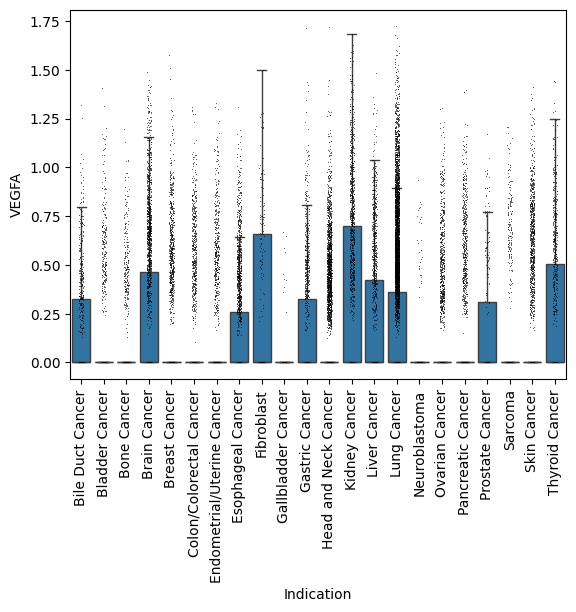

In [14]:
#VEGFA vs indication
df = sc.get.obs_df(adata, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']
sns.boxplot(data=df, x='Indication', y='VEGFA', showfliers=False)
sns.stripplot(data=df, x='Indication', y='VEGFA', color='black', size=0.5, jitter=True)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Bile Duct Cancer'),
  Text(1, 0, 'Bladder Cancer'),
  Text(2, 0, 'Bone Cancer'),
  Text(3, 0, 'Brain Cancer'),
  Text(4, 0, 'Breast Cancer'),
  Text(5, 0, 'Colon/Colorectal Cancer'),
  Text(6, 0, 'Endometrial/Uterine Cancer'),
  Text(7, 0, 'Esophageal Cancer'),
  Text(8, 0, 'Fibroblast'),
  Text(9, 0, 'Gallbladder Cancer'),
  Text(10, 0, 'Gastric Cancer'),
  Text(11, 0, 'Head and Neck Cancer'),
  Text(12, 0, 'Kidney Cancer'),
  Text(13, 0, 'Liver Cancer'),
  Text(14, 0, 'Lung Cancer'),
  Text(15, 0, 'Neuroblastoma'),
  Text(16, 0, 'Ovarian Cancer'),
  Text(17, 0, 'Pancreatic Cancer'),
  Text(18, 0, 'Prostate Cancer'),
  Text(19, 0, 'Sarcoma'),
  Text(20, 0, 'Skin Cancer'),
  Text(21, 0, 'Thyroid Cancer')])

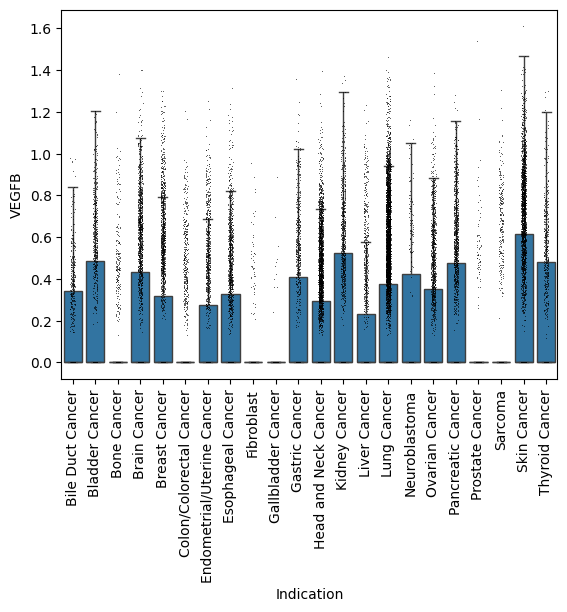

In [15]:
#VEGFB vs indication
df = sc.get.obs_df(adata, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']
sns.boxplot(data=df, x='Indication', y='VEGFB', showfliers=False)
sns.stripplot(data=df, x='Indication', y='VEGFB', color='black', size=0.5, jitter=True)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'BT474_BREAST'),
  Text(1, 0, 'BT549_BREAST'),
  Text(2, 0, 'CAMA1_BREAST'),
  Text(3, 0, 'EFM192A_BREAST'),
  Text(4, 0, 'HCC38_BREAST'),
  Text(5, 0, 'HCC1419_BREAST'),
  Text(6, 0, 'HCC1428_BREAST'),
  Text(7, 0, 'HDQP1_BREAST'),
  Text(8, 0, 'HMC18_BREAST'),
  Text(9, 0, 'KPL1_BREAST'),
  Text(10, 0, 'MCF7_BREAST'),
  Text(11, 0, 'MDAMB361_BREAST'),
  Text(12, 0, 'MDAMB436_BREAST'),
  Text(13, 0, 'T47D_BREAST'),
  Text(14, 0, 'ZR751_BREAST')])

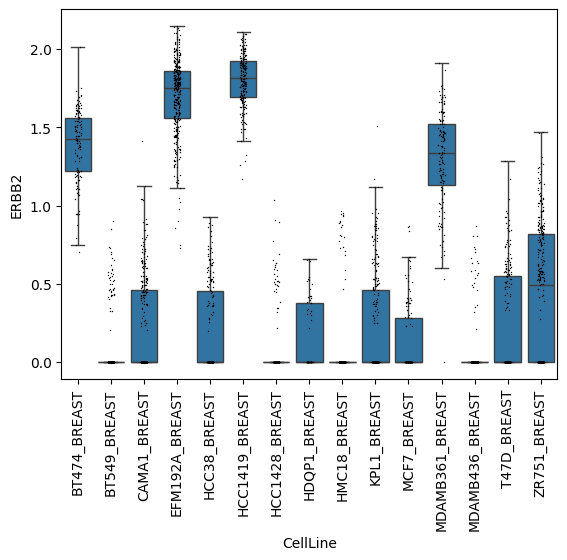

In [16]:
#HER2 vs breast cancer cell lines
adata_breast = adata[adata.obs.Indication=='Breast Cancer'].copy()
df = sc.get.obs_df(adata_breast, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_breast.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'A375_SKIN'),
  Text(1, 0, 'A2058_SKIN'),
  Text(2, 0, 'C32_SKIN'),
  Text(3, 0, 'COLO741_SKIN'),
  Text(4, 0, 'COLO792_SKIN'),
  Text(5, 0, 'HS852T_SKIN'),
  Text(6, 0, 'HS939T_SKIN'),
  Text(7, 0, 'IGR1_SKIN'),
  Text(8, 0, 'IGR37_SKIN'),
  Text(9, 0, 'RVH421_SKIN'),
  Text(10, 0, 'SKMEL2_SKIN'),
  Text(11, 0, 'SKMEL3_SKIN'),
  Text(12, 0, 'SKMEL5_SKIN'),
  Text(13, 0, 'SKMEL30_SKIN'),
  Text(14, 0, 'UACC257_SKIN'),
  Text(15, 0, 'WM88_SKIN')])

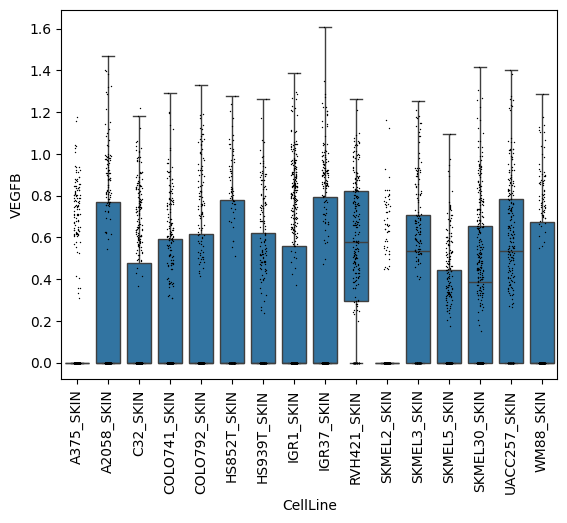

In [44]:
#VEGF-B expression vs skin cancer
adata_skin = adata[adata.obs.Indication=='Skin Cancer'].copy()
df = sc.get.obs_df(adata_skin, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_skin.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='VEGFB', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='VEGFB', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'A375_SKIN'),
  Text(1, 0, 'A2058_SKIN'),
  Text(2, 0, 'C32_SKIN'),
  Text(3, 0, 'COLO741_SKIN'),
  Text(4, 0, 'COLO792_SKIN'),
  Text(5, 0, 'HS852T_SKIN'),
  Text(6, 0, 'HS939T_SKIN'),
  Text(7, 0, 'IGR1_SKIN'),
  Text(8, 0, 'IGR37_SKIN'),
  Text(9, 0, 'RVH421_SKIN'),
  Text(10, 0, 'SKMEL2_SKIN'),
  Text(11, 0, 'SKMEL3_SKIN'),
  Text(12, 0, 'SKMEL5_SKIN'),
  Text(13, 0, 'SKMEL30_SKIN'),
  Text(14, 0, 'UACC257_SKIN'),
  Text(15, 0, 'WM88_SKIN')])

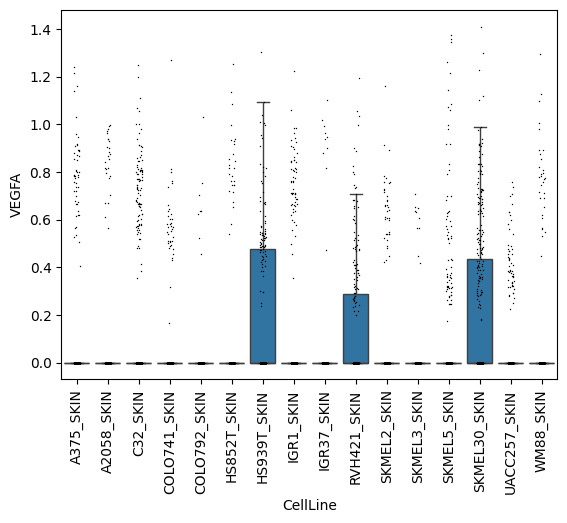

In [47]:
#VEGF-A expression vs skin cancer
adata_skin = adata[adata.obs.Indication=='Skin Cancer'].copy()
df = sc.get.obs_df(adata_skin, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_skin.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='VEGFA', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='VEGFA', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2313287_STOMACH'),
  Text(1, 0, 'IM95_STOMACH'),
  Text(2, 0, 'LMSU_STOMACH'),
  Text(3, 0, 'MKN7_STOMACH'),
  Text(4, 0, 'MKN45_STOMACH'),
  Text(5, 0, 'SH10TC_STOMACH')])

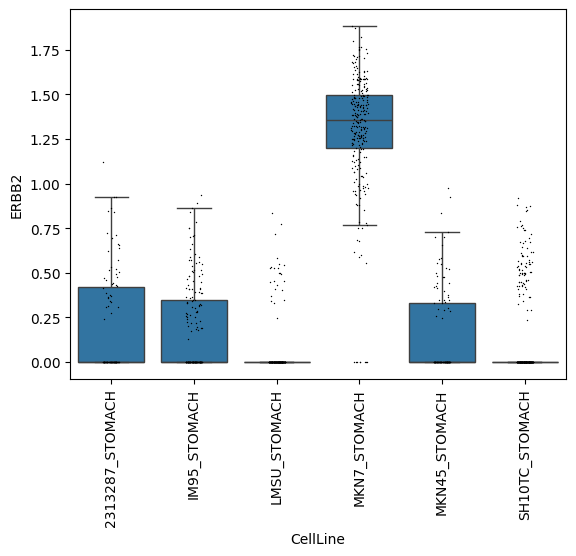

In [18]:
#HER2 vs gastric (stomach) cancer cell lines
adata_gastric = adata[adata.obs.Indication=='Gastric Cancer'].copy()
df = sc.get.obs_df(adata_gastric, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_gastric.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'ABC1_LUNG'),
  Text(1, 0, 'ACCMESO1_PLEURA'),
  Text(2, 0, 'CALU6_LUNG'),
  Text(3, 0, 'EBC1_LUNG'),
  Text(4, 0, 'EKVX_LUNG'),
  Text(5, 0, 'HCC366_LUNG'),
  Text(6, 0, 'IALM_LUNG'),
  Text(7, 0, 'MSTO211H_PLEURA'),
  Text(8, 0, 'NCIH226_LUNG'),
  Text(9, 0, 'NCIH292_LUNG'),
  Text(10, 0, 'NCIH358_LUNG'),
  Text(11, 0, 'NCIH446_LUNG'),
  Text(12, 0, 'NCIH460_LUNG'),
  Text(13, 0, 'NCIH522_LUNG'),
  Text(14, 0, 'NCIH650_LUNG'),
  Text(15, 0, 'NCIH727_LUNG'),
  Text(16, 0, 'NCIH1048_LUNG'),
  Text(17, 0, 'NCIH1299_LUNG'),
  Text(18, 0, 'NCIH1373_LUNG'),
  Text(19, 0, 'NCIH1435_LUNG'),
  Text(20, 0, 'NCIH1568_LUNG'),
  Text(21, 0, 'NCIH1792_LUNG'),
  Text(22, 0, 'NCIH1944_LUNG'),
  Text(23, 0, 'NCIH2073_LUNG'),
  Text(24, 0, 'NCIH2077_LUNG'),
  Te

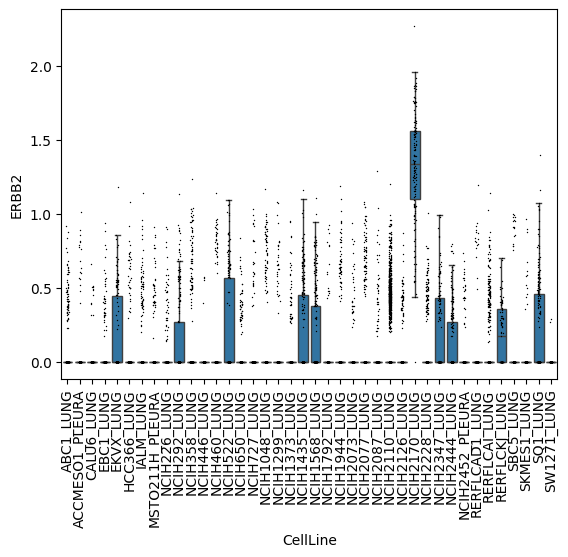

In [26]:
#HER2 vs lung cancer cell lines
adata_lung = adata[adata.obs.Indication=='Lung Cancer'].copy()
df = sc.get.obs_df(adata_lung, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_lung.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)


In [39]:
#stats for ERBB2 expression in NCIH2170_LUNG
import pandas as pd

# Verify that the 'CellLine' values are correct
print(df['CellLine'].unique())

# Filter data for NCIH_2170 and other cell lines
df_target = df[df['CellLine'] == 'NCIH2170_LUNG'].copy()
df_others = df[df['CellLine'] != 'NCIH2170_LUNG'].copy()

# Check sample sizes
print(f"Sample size for NCIH2170_LUNG: {len(df_target)}")
print(f"Sample size for other cell lines: {len(df_others)}")

# Check for NaNs in ERBB2
print(df_target['ERBB2'].isna().sum())
print(df_others['ERBB2'].isna().sum())

# Ensure ERBB2 is numeric
print(df_target['ERBB2'].dtype)
print(df_others['ERBB2'].dtype)

from scipy import stats

# Check sample sizes again
if len(df_target) > 1 and len(df_others) > 1:
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(df_target['ERBB2'], df_others['ERBB2'], equal_var=False)
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
else:
    print("Sample sizes are insufficient for t-test.")


from scipy import stats

# Perform t-test if sample sizes are sufficient
if len(df_target) > 0 and len(df_others) > 0:
    t_stat, p_value = stats.ttest_ind(df_target['ERBB2'], df_others['ERBB2'], equal_var=False)
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

    # Perform Mann-Whitney U test as a backup
    u_stat, p_value = stats.mannwhitneyu(df_target['ERBB2'], df_others['ERBB2'])
    print(f"U-statistic: {u_stat}, P-value: {p_value}")
else:
    print("Sample sizes are insufficient for statistical testing.")




['NCIH2126_LUNG', 'NCIH446_LUNG', 'NCIH2452_PLEURA', 'SW1271_LUNG', 'SQ1_LUNG', ..., 'NCIH1435_LUNG', 'NCIH2228_LUNG', 'HCC366_LUNG', 'NCIH2444_LUNG', 'NCIH2073_LUNG']
Length: 40
Categories (40, object): ['ABC1_LUNG', 'ACCMESO1_PLEURA', 'CALU6_LUNG', 'EBC1_LUNG', ..., 'SBC5_LUNG', 'SKMES1_LUNG', 'SQ1_LUNG', 'SW1271_LUNG']
Sample size for NCIH2170_LUNG: 142
Sample size for other cell lines: 12700
0
0
float64
float64
T-statistic: 38.66725312879398, P-value: 2.551458288533391e-77
T-statistic: 38.66725312879398, P-value: 2.551458288533391e-77
U-statistic: 1783297.0, P-value: 6.280048379792447e-193


In [45]:
#stats for VEGF-B expression in RVH421_SKIN
import pandas as pd
from scipy import stats

# Assuming 'df' is your DataFrame and 'adata' is your AnnData object

# Verify that the 'CellLine' values are correct
print("Unique cell lines:", df['CellLine'].unique())

# Check if 'RVH421_SKIN' is in the dataset
if 'RVH421_SKIN' not in df['CellLine'].unique():
    print("Cell line 'RVH421_SKIN' not found in the dataset.")
else:
    # Filter data for RVH421_SKIN and other cell lines
    df_target = df[df['CellLine'] == 'RVH421_SKIN'].copy()
    df_others = df[df['CellLine'] != 'RVH421_SKIN'].copy()

    # Check sample sizes
    print(f"Sample size for RVH421_SKIN: {len(df_target)}")
    print(f"Sample size for other cell lines: {len(df_others)}")

    # Check for NaNs in VEGFB
    print("NaNs in RVH421_SKIN VEGFB:", df_target['VEGFB'].isna().sum())
    print("NaNs in other cell lines VEGFB:", df_others['VEGFB'].isna().sum())

    # Ensure VEGFB is numeric
    print("Data type for RVH421_SKIN VEGFB:", df_target['VEGFB'].dtype)
    print("Data type for other cell lines VEGFB:", df_others['VEGFB'].dtype)

    # Drop NaNs if present
    df_target = df_target.dropna(subset=['VEGFB'])
    df_others = df_others.dropna(subset=['VEGFB'])

    # Perform statistical tests if sample sizes are sufficient
    if len(df_target) > 1 and len(df_others) > 1:
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(df_target['VEGFB'], df_others['VEGFB'], equal_var=False)
        print(f"T-statistic: {t_stat}, P-value: {p_value}")

        # Perform Mann-Whitney U test as a backup
        u_stat, p_value = stats.mannwhitneyu(df_target['VEGFB'], df_others['VEGFB'])
        print(f"U-statistic: {u_stat}, P-value: {p_value}")
    else:
        print("Sample sizes are insufficient for statistical testing.")


Unique cell lines: ['C32_SKIN', 'COLO741_SKIN', 'WM88_SKIN', 'SKMEL2_SKIN', 'SKMEL3_SKIN', ..., 'RVH421_SKIN', 'HS939T_SKIN', 'COLO792_SKIN', 'SKMEL5_SKIN', 'UACC257_SKIN']
Length: 16
Categories (16, object): ['A375_SKIN', 'A2058_SKIN', 'C32_SKIN', 'COLO741_SKIN', ..., 'SKMEL5_SKIN', 'SKMEL30_SKIN', 'UACC257_SKIN', 'WM88_SKIN']
Sample size for RVH421_SKIN: 239
Sample size for other cell lines: 5112
NaNs in RVH421_SKIN VEGFB: 0
NaNs in other cell lines VEGFB: 0
Data type for RVH421_SKIN VEGFB: float64
Data type for other cell lines VEGFB: float64
T-statistic: 12.360497873803244, P-value: 5.1300513404974305e-28
U-statistic: 861955.5, P-value: 2.879276023199637e-35


In [46]:
#stats for VEGF-A expression in RVH421_SKIN
import pandas as pd
from scipy import stats

# Assuming 'df' is your DataFrame and 'adata' is your AnnData object

# Verify that the 'CellLine' values are correct
print("Unique cell lines:", df['CellLine'].unique())

# Check if 'RVH421_SKIN' is in the dataset
if 'RVH421_SKIN' not in df['CellLine'].unique():
    print("Cell line 'RVH421_SKIN' not found in the dataset.")
else:
    # Filter data for RVH421_SKIN and other cell lines
    df_target = df[df['CellLine'] == 'RVH421_SKIN'].copy()
    df_others = df[df['CellLine'] != 'RVH421_SKIN'].copy()

    # Check sample sizes
    print(f"Sample size for RVH421_SKIN: {len(df_target)}")
    print(f"Sample size for other cell lines: {len(df_others)}")

    # Check for NaNs in VEGFB
    print("NaNs in RVH421_SKIN VEGFB:", df_target['VEGFA'].isna().sum())
    print("NaNs in other cell lines VEGFB:", df_others['VEGFA'].isna().sum())

    # Ensure VEGFB is numeric
    print("Data type for RVH421_SKIN VEGFA:", df_target['VEGFA'].dtype)
    print("Data type for other cell lines VEGFB:", df_others['VEGFA'].dtype)

    # Drop NaNs if present
    df_target = df_target.dropna(subset=['VEGFA'])
    df_others = df_others.dropna(subset=['VEGFA'])

    # Perform statistical tests if sample sizes are sufficient
    if len(df_target) > 1 and len(df_others) > 1:
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(df_target['VEGFA'], df_others['VEGFA'], equal_var=False)
        print(f"T-statistic: {t_stat}, P-value: {p_value}")

        # Perform Mann-Whitney U test as a backup
        u_stat, p_value = stats.mannwhitneyu(df_target['VEGFA'], df_others['VEGFA'])
        print(f"U-statistic: {u_stat}, P-value: {p_value}")
    else:
        print("Sample sizes are insufficient for statistical testing.")


Unique cell lines: ['C32_SKIN', 'COLO741_SKIN', 'WM88_SKIN', 'SKMEL2_SKIN', 'SKMEL3_SKIN', ..., 'RVH421_SKIN', 'HS939T_SKIN', 'COLO792_SKIN', 'SKMEL5_SKIN', 'UACC257_SKIN']
Length: 16
Categories (16, object): ['A375_SKIN', 'A2058_SKIN', 'C32_SKIN', 'COLO741_SKIN', ..., 'SKMEL5_SKIN', 'SKMEL30_SKIN', 'UACC257_SKIN', 'WM88_SKIN']
Sample size for RVH421_SKIN: 239
Sample size for other cell lines: 5112
NaNs in RVH421_SKIN VEGFB: 0
NaNs in other cell lines VEGFB: 0
Data type for RVH421_SKIN VEGFA: float64
Data type for other cell lines VEGFB: float64
T-statistic: 3.5797214104607558, P-value: 0.0004108584616311083
U-statistic: 705722.5, P-value: 7.095043826611918e-11
